# **Data Set Name: Video_Games_Sales**

1. When and Who created the dataset?

GREGORYSMITH · UPDATED 7 YEARS AGO

## 2. How did you get acess to the dataset?**
From Kaggle


**Attributes** (Columns) of the dataset:

1.Rank<br>
2.Name<br>
3.Platform<br>
4.Year<br>
5.Genre<br>
6.Publisher<br>
7.NA_Sales<br>
8.EU_Sales<br>
9.JP_Sales<br>
10.Other_Sales<br>
11.Global_Sales<br>

**Probable** questions that the dataset could answer:

What are the top-selling video games of all time?

Which gaming platforms have the most top-selling games?

How do sales vary by region (North America, Europe, Japan, Other)?

What is the distribution of game genres among the top-selling titles?

Which publishers have the most games in the top-selling list?

How does the release year of a game correlate with its sales?

Are there any trends in global video game sales over time?

**Assessment** of basic fitness of the dataset:

The dataset appears to be well-structured and informative, containing relevant attributes such as game title, platform, genre, sales figures across different regions, and publisher information. It allows for analysis of top-selling video games and provides insights into sales trends. However, further information such as developer, rating, and critical reception could enhance the dataset's richness. Overall, it provides a good foundation for basic analysis of video game sales.

# Final Assesment

Name: Anish Bahadur Karki

Student Id: 2329231

Module Leader: Mr.Siman Giri

Tutor: Mr. Basudeo Shrestha

#Importing Libraries

In [63]:

import pandas as pd  # Importing pandas library for data manipulation
import numpy as np   # Importing numpy library for numerical operations
import matplotlib.pyplot as plt   # Importing matplotlib library for data visualization
import seaborn as sns   # Importing seaborn library for statistical data visualization
from sklearn.model_selection import train_test_split   # Importing train_test_split function to split data into training and testing sets
from sklearn.linear_model import LinearRegression   # Importing Linear Regression model
from sklearn.tree import DecisionTreeRegressor   # Importing Decision Tree Regressor model
from sklearn.metrics import mean_squared_error, r2_score   # Importing evaluation metrics for regression problems
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV   # Importing functions for hyperparameter tuning
from sklearn.feature_selection import SelectKBest, f_regression   # Importing feature selection methods
from sklearn.ensemble import RandomForestRegressor   # Importing Random Forest Regressor model




#Mounting Google Drive

In [64]:
from google.colab import drive  # Importing the 'drive' module from the 'google.colab' library to enable interaction with Google Drive
drive.mount('/content/drive')  # Mounting the Google Drive to the Colab runtime and specifying the target directory as '/content/drive'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
# Importing the pandas library as 'pd' for data manipulation
import pandas as pd

# Reading a CSV file named "video_games_sales.csv" and storing the data in a DataFrame named 'df'
df = pd.read_csv("/content/drive/MyDrive/video_games_sales.csv")



#Data Understanding, Cleaning and Transformations

In [66]:
df.head()


,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [68]:
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [69]:
df.shape # returns a tuple representing the dimensions of a DataFrame df, where the first element is the number of rows and the second element is the number of columns. It's a quick way to check the size of your DataFrame.

(16598, 11)

In [70]:
df.isnull().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [71]:
# Handling missing values in 'year' column
median_year = df['year'].median()
df['year'].fillna(median_year, inplace=True)

# Handling missing values in 'publisher' column
most_common_publisher = df['publisher'].mode()[0]
df['publisher'].fillna(most_common_publisher, inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())

rank            0
name            0
platform        0
year            0
genre           0
publisher       0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64


In [72]:
df.axes

[RangeIndex(start=0, stop=16598, step=1),
 Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
        'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
       dtype='object')]

In [73]:
df.values

array([[1, 'Wii Sports', 'Wii', ..., 3.77, 8.46, 82.74],
       [2, 'Super Mario Bros.', 'NES', ..., 6.81, 0.77, 40.24],
       [3, 'Mario Kart Wii', 'Wii', ..., 3.79, 3.31, 35.82],
       ...,
       [16598, 'SCORE International Baja 1000: The Official Game', 'PS2',
        ..., 0.0, 0.0, 0.01],
       [16599, 'Know How 2', 'DS', ..., 0.0, 0.0, 0.01],
       [16600, 'Spirits & Spells', 'GBA', ..., 0.0, 0.0, 0.01]],
      dtype=object)

In [74]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16598, dtype: bool

# Data Analysis and Visualization

<ipython-input-75-fc3049ddba04>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=region_sales, ci=None)


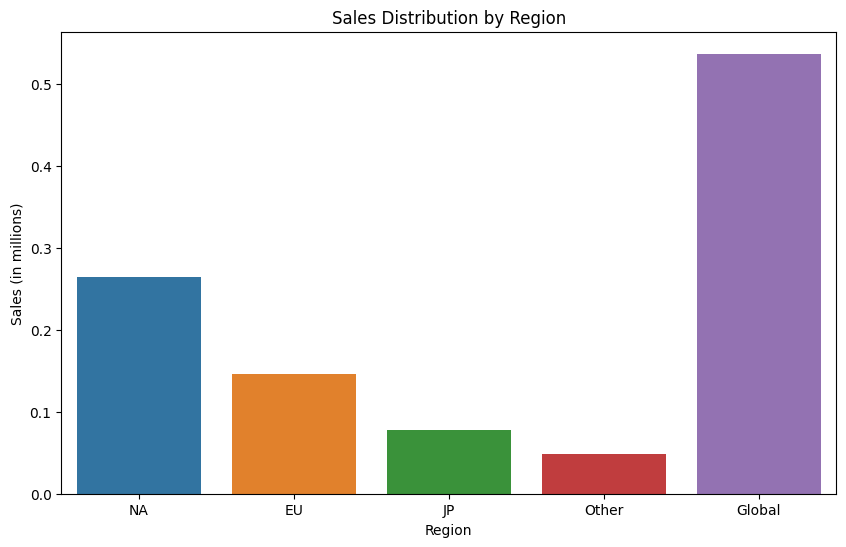

In [75]:
# Sales Distribution by Region
# Extracting the relevant columns for regional sales from the DataFrame
region_sales = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']]

# Creating a new figure with a specific size
plt.figure(figsize=(10, 6))

# Generating a bar plot to visualize the distribution of sales across regions using Seaborn
sns.barplot(data=region_sales, ci=None)

# Setting the title of the plot
plt.title('Sales Distribution by Region')

# Labeling the y-axis
plt.ylabel('Sales (in millions)')

# Labeling the x-axis
plt.xlabel('Region')

# Setting custom ticks and labels for the x-axis
plt.xticks(ticks=range(5), labels=['NA', 'EU', 'JP', 'Other', 'Global'])

# Displaying the plot
plt.show()


<b>The graphic shows a bar graph that shows sales distribution by region. The graph shows five regions, with the largest being the EU, followed by JP (Japan) and Other Global Region. The remaining two regions are North America (NA) and the Global Region. Each region is represented by a distinct color, with the EU in purple, Japan in blue, Other Global Region in green, North America in red, and the Global Region in yellow. The graph also shows sales (in millions) for each region, with the EU having the largest sales, followed by Japan and the Other Global Region.</b>

<ipython-input-76-d5ab368e1cbc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')


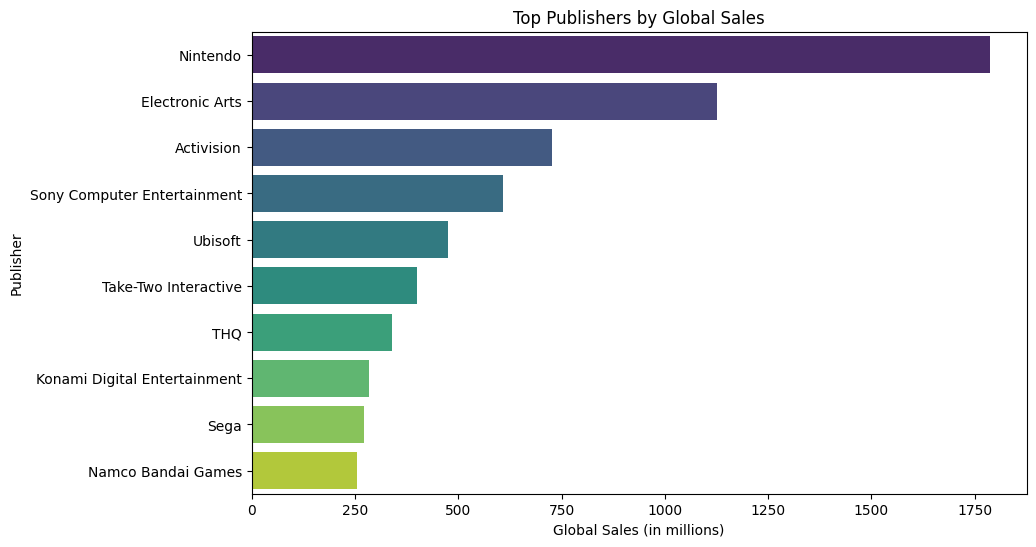

In [76]:
# Top Publishers by Global Sales
# Grouping the DataFrame by 'publisher' and calculating the sum of global sales, then sorting in descending order and selecting the top 10
top_publishers = df.groupby('publisher')['global_sales'].sum().sort_values(ascending=False).head(10)

# Creating a new figure with a specific size
plt.figure(figsize=(10, 6))

# Generating a horizontal bar plot to visualize the top publishers by global sales using Seaborn, using the 'viridis' color palette
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')

# Setting the title of the plot
plt.title('Top Publishers by Global Sales')

# Labeling the x-axis
plt.xlabel('Global Sales (in millions)')

# Labeling the y-axis
plt.ylabel('Publisher')

# Displaying the plot
plt.show()


<b>The graphic shows a bar graph of the top publishers by global sales. The graph depicts the ranks of numerous firms, with Nintendo Electronic Arts on top, followed by Activision, Sony Computer Entertainment, Publisher Ubisoft, Take-Two Interactive, THQ, Konami Digital Entertainment, Sega, Namco Bandai Games, and Global Sales (in millions).
</b>

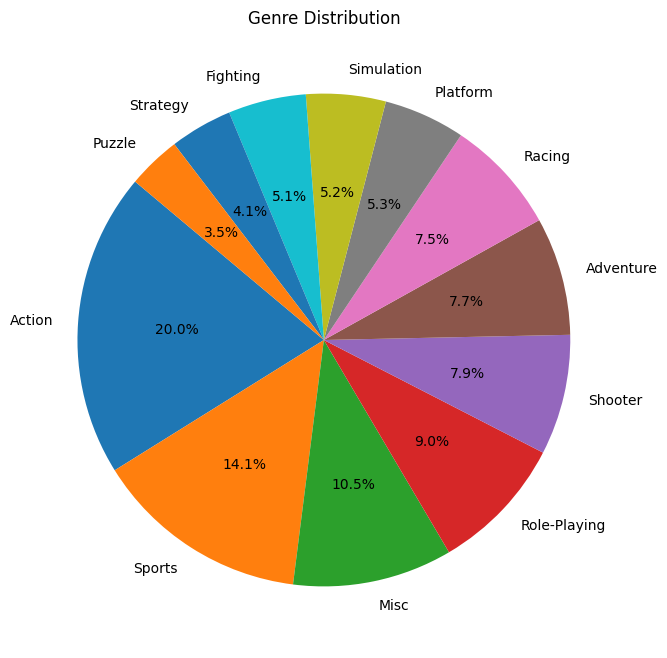

In [77]:
# Genre Distribution
# Creating a new square figure with equal width and height
plt.figure(figsize=(8, 8))

# Counting the occurrences of each genre and creating a pie chart, with percentages displayed as labels and starting angle set to 140 degrees
df['genre'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Setting the title of the plot
plt.title('Genre Distribution')

# Removing the y-label to avoid redundancy in the pie chart
plt.ylabel('')

# Displaying the plot
plt.show()


The image shows a pie chart with the distribution of different genres in a video game. The chart is divided into parts, each reflecting a particular genre. Fighting Simulation, Platform, Strategy, Puzzle, Racing, Adventure, Action, Shooter, and Role-Playing games are among the available genres. The figure reveals that Action is the most popular video game genre, accounting for 20.0%.


# Univariate

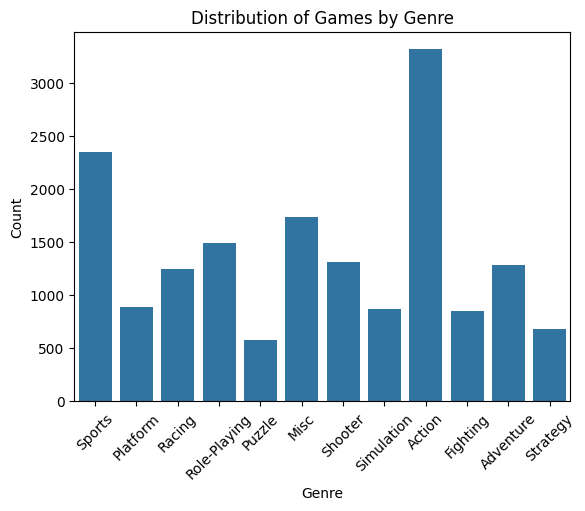

In [78]:
# Univariate Analysis: Count Plot
# Creating a count plot to visualize the distribution of games by genre using Seaborn
sns.countplot(x='genre', data=df)

# Setting the title of the plot
plt.title('Distribution of Games by Genre')

# Labeling the x-axis
plt.xlabel('Genre')

# Labeling the y-axis
plt.ylabel('Count')

# Rotating the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()


The image exhibits a bar graph that shows the distribution of games by genre. The graph depicts a total of 3000 games, including 2500 in the "Action" genre, 2000 in the "Adventure" genre, 1500 in the "RPG" genre, 1000 in the "Sports" genre, and 500 in the "Strategy" category.



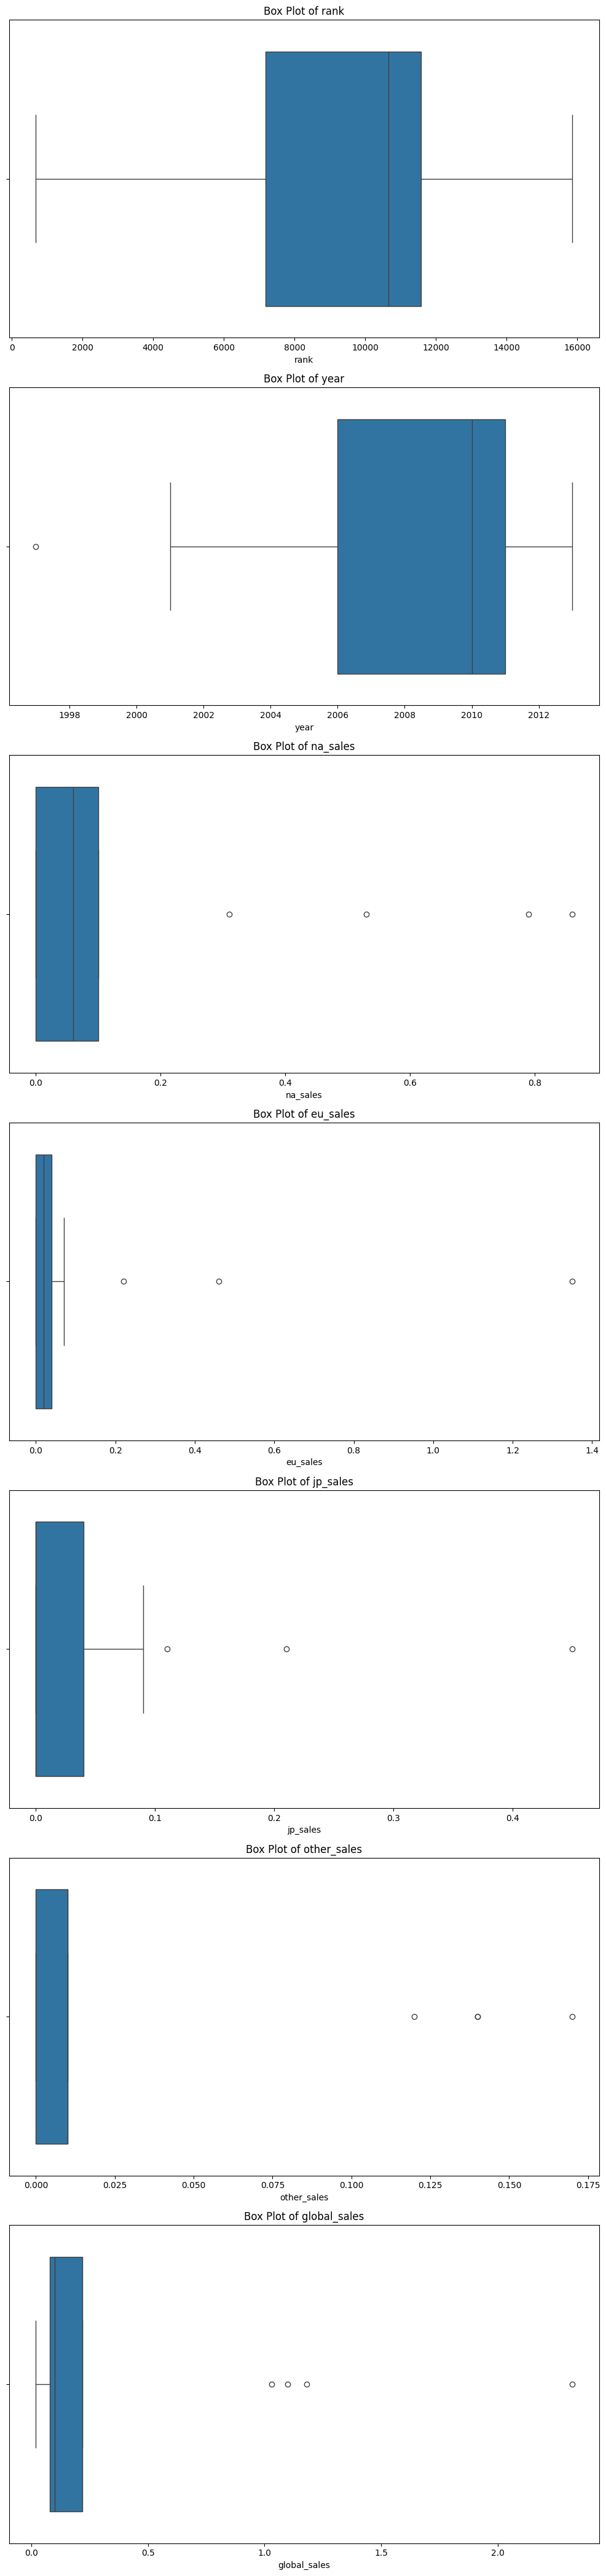

In [79]:
# Sample a subset of the data for visualization
sampled_df = df.sample(frac=0.001)  # Adjust the fraction as needed

# Selecting numerical columns for box plots
numerical_columns = sampled_df.select_dtypes(include=['int64', 'float64']).columns

# Create subplots for each numerical attribute
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 6 * len(numerical_columns)))

# Plotting box plots
for i, attribute in enumerate(numerical_columns):
    sns.boxplot(x=sampled_df[attribute], ax=axes[i])
    axes[i].set_title(f'Box Plot of {attribute}')

plt.tight_layout()
plt.show()

The graphic shows a sequence of box plots, each representing a separate dataset. The box plots are organized in a grid-like arrangement, with each plot displaying different information such as minimum and maximum values, interquartile range (IQR), and outliers. The datasets depicted in the box plots are "ran", "year", "na_sale", "eu_sales", and "other_sales".


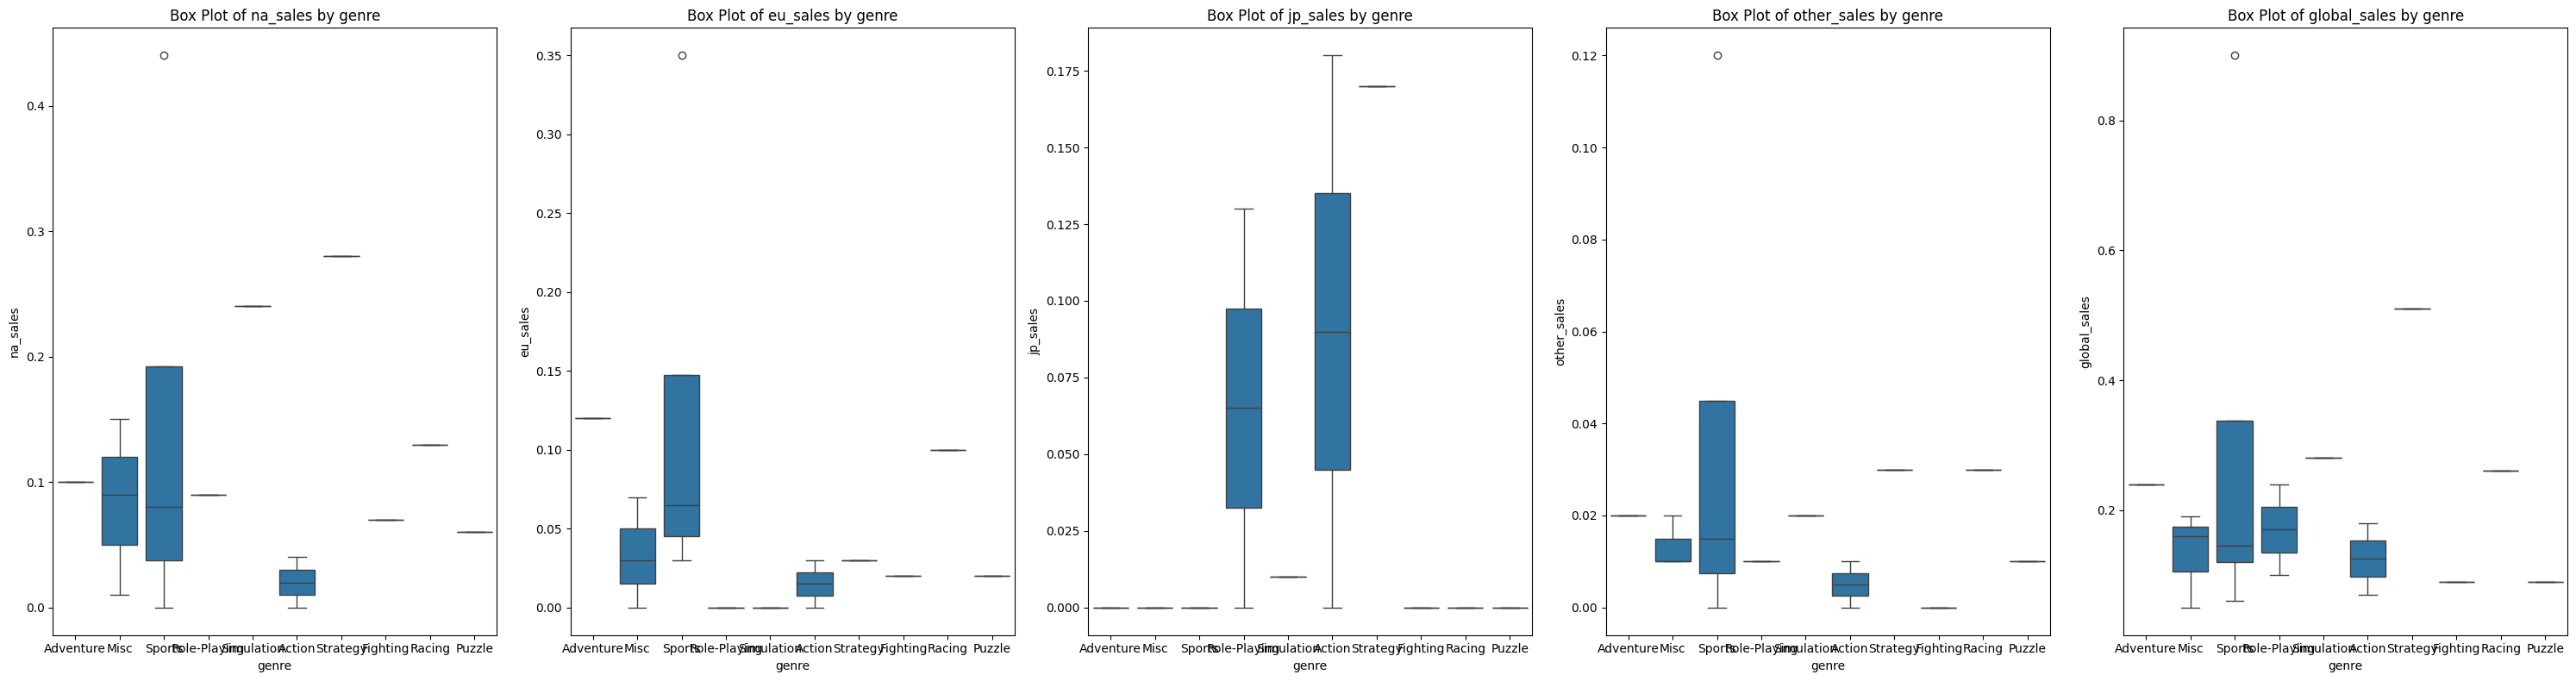

In [80]:
# Sampling a small fraction of the data
sampled_df = df.sample(frac=0.001)

# Selecting attributes for box plots
numerical_attributes = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']
categorical_attribute = 'genre'

# Create subplots for each numerical attribute
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_attributes), figsize=(30, 8))

# Plotting box plots
for i, attribute in enumerate(numerical_attributes):
    sns.boxplot(x=categorical_attribute, y=attribute, data=sampled_df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {attribute} by {categorical_attribute}')
    axes[i].set_ylabel(attribute)

plt.tight_layout()
plt.show()

The graphic shows a succession of box plots, each indicating the distribution of sales for a certain genre. The box plots are organized in a grid, with each genre denoted by a different color. The plots depict the sales distribution for each genre, with the x-axis showing the range and the y-axis reflecting the frequency of sales. The plots also show a horizontal line showing the median sales value for each genre.


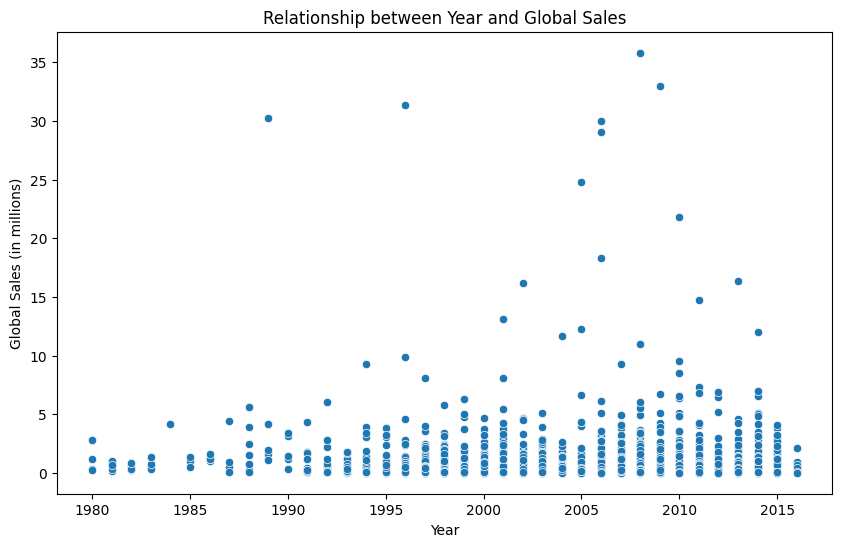

In [81]:
# Sampling a small fraction of the data
sampled_df = df.sample(frac=0.3)

# Scatter Plot: Relationship between 'year' and 'global_sales'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='global_sales', data=sampled_df)
plt.title('Relationship between Year and Global Sales')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.show()

The graphic illustrates a line graph illustrating the link between year and global sales, with blue dots representing values ranging from 40 to 5. The x-axis depicts the years 1980–2015, and the y-axis indicates global sales in millions.


In [82]:
df.corr()

<ipython-input-82-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
rank,1.000000,0.177526,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
year,0.177526,1.000000,-0.091282,0.005824,-0.169432,0.040857,-0.074807
na_sales,-0.401362,-0.091282,1.000000,0.767727,0.449787,0.634737,0.941047
eu_sales,-0.379123,0.005824,0.767727,1.000000,0.435584,0.726385,0.902836
jp_sales,-0.267785,-0.169432,0.449787,0.435584,1.000000,0.290186,0.611816
other_sales,-0.332986,0.040857,0.634737,0.726385,0.290186,1.000000,0.748331
global_sales,-0.427407,-0.074807,0.941047,0.902836,0.611816,0.748331,1.000000


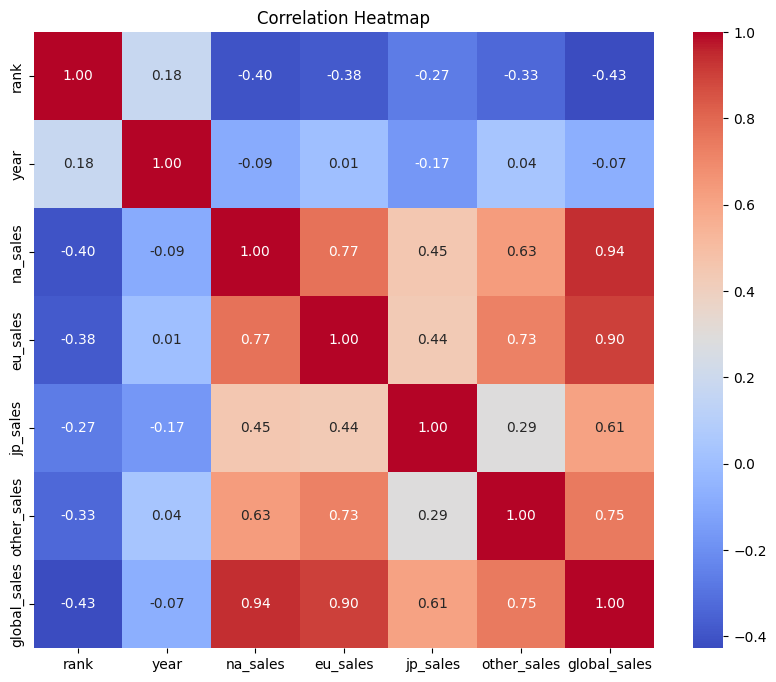

In [83]:
columns_to_correlate = ['rank', 'year', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']

# Filter the DataFrame to include only the columns of interest
data_for_correlation = df[columns_to_correlate]

# Calculate the correlation matrix
correlation_matrix = data_for_correlation.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The graphic shows a correlation heatmap, a visual representation of the relationship between two or more variables. In this scenario, the heatmap depicts the relationship between numerous sales data, including year, na_sales, eu_sales, jp_sales, and other sales. The heatmap is color-coded, with deeper colors representing stronger positive correlations and lighter hues suggesting stronger negative correlations. The overall arrangement of the heatmap implies that the data contains a variety of patterns and trends, which could be beneficial for evaluating and understanding the relationships between certain sales KPIs.


# Model Traning

# Splitting text

In [84]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each categorical column and apply label encoding
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [85]:
X = df.drop(columns=['global_sales'])  # Features
y = df['global_sales']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [86]:
X_train.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
14303,14306,9036,19,2006.0,3,340,0.03,0.0,0.00,0.00
13455,13457,6647,4,2008.0,9,525,0.04,0.0,0.00,0.00
6724,6726,11271,17,2015.0,0,446,0.00,0.0,0.25,0.00
898,900,10096,13,2003.0,9,138,1.03,0.8,0.00,0.09
8484,8486,5313,4,2010.0,7,465,0.12,0.0,0.03,0.01


In [87]:
y_train

14303    0.03
13455    0.04
6724     0.25
898      1.92
8484     0.16
         ... 
11284    0.08
11964    0.07
5390     0.34
860      1.97
15795    0.02
Name: global_sales, Length: 13278, dtype: float64

In [88]:
print("{}% data is in the training set".format((X_train.shape[0] / X.shape[0]) * 100))
print("{}% data is in the testing set".format((X_test.shape[0] / X.shape[0]) * 100))

79.9975900710929% data is in the training set
20.0024099289071% data is in the testing set


In [89]:
# Print the shape of X_train
print("Shape of X_train:", X_train.shape)

# Print the number of non-zero elements in X_train
print("Number of non-zero elements in X_train:", X_train.to_numpy().nonzero()[0].size)

Shape of X_train: (13278, 10)
Number of non-zero elements in X_train: 108236


# Linear regression

In [90]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [91]:
y_pred_test= lr_model.predict(X_test)
y_pred_test

array([0.15050495, 0.41011437, 0.02111815, ..., 0.02077507, 0.10040053,
       0.10071969])

In [92]:
y_pred_train =lr_model.predict(X_train)
y_pred_train

array([0.03070487, 0.04061192, 0.2499215 , ..., 0.33974434, 1.96949791,
       0.01072845])

In [93]:
# Predicting the test results
y_pred=lr_model.predict(X_test)
y_pred

array([0.15050495, 0.41011437, 0.02111815, ..., 0.02077507, 0.10040053,
       0.10071969])

In [94]:
lr_predictions = lr_model.predict(X_test)

In [95]:
# Evaluation Metrics
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

In [96]:
print("Linear Regression Model:")
print("Mean Squared Error:", lr_mse)
print("R-squared Score:", lr_r2)

Linear Regression Model:
Mean Squared Error: 2.7279499702194155e-05
R-squared Score: 0.9999935069896693


# Ridge regression

Another model, the ridge regression model, is used as a reference for evaluating the model.
Ridge regression is an extension of linear regression that addresses multicollinearity (where two or more independent characteristics are significantly linked) by inserting a regularization parameter.


In [97]:
from sklearn.linear_model import Ridge


In [98]:
# Ridge Regression Model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization
ridge_model.fit(X_train, y_train)
# Predictions
ridge_predictions = ridge_model.predict(X_test)

In [99]:
# Evaluation Metrics
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

print("Ridge Regression Model:")
print("Mean Squared Error:", ridge_mse)
print("R-squared Score:", ridge_r2)

Ridge Regression Model:
Mean Squared Error: 2.7883004911318846e-05
R-squared Score: 0.9999933633446024


# Linear Regression Model

Linear Regression is a regression model that finds a linear relationship between independent and dependent variables. It assumes that the relation ship is linear and the residuals are normally distributed.


In [100]:
if lr_r2 > ridge_r2:
    print("Linear Regression Model performed better.")
else:
    print("Ridge Regression Model performed better.")


Linear Regression Model performed better.


In [101]:
# R-squared score for Linear Regression
lr_r2 = r2_score(y_test, lr_predictions)

# R-squared score for Ridge Regression
ridge_r2 = r2_score(y_test, ridge_predictions)

# Compare R-squared scores
if lr_r2 > ridge_r2:
    print("Linear Regression Model has a higher R-squared score.")
elif lr_r2 < ridge_r2:
    print("Ridge Regression Model has a higher R-squared score.")
else:
    print("Both Linear Regression and Ridge Regression Models have the same R-squared score.")

Linear Regression Model has a higher R-squared score.


In [102]:
x_range = np.linspace(min(y_test), max(y_test), 100)

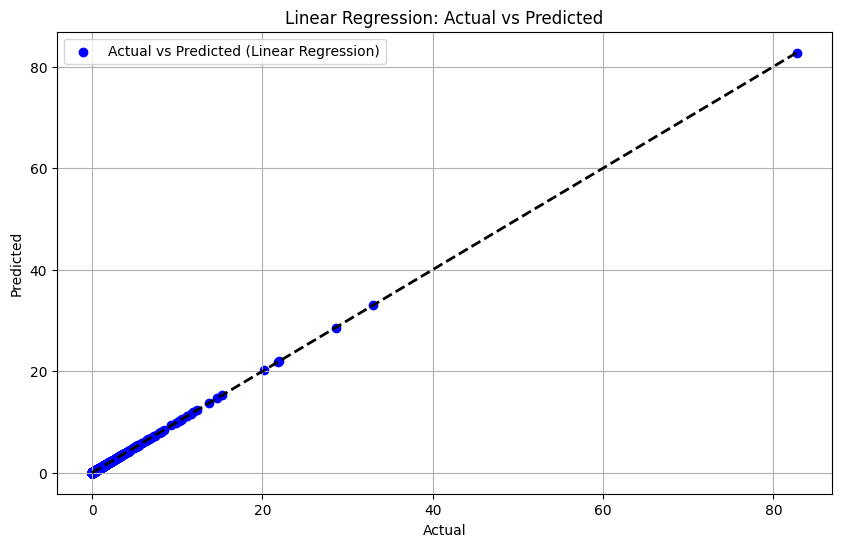

In [103]:
# Scatter plot for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions, color='blue', label='Actual vs Predicted (Linear Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the best-fit line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


The graphic shows a scatter plot, with a blue line indicating the actual values and a red line showing the anticipated values. Actual values are represented on the y-axis, and forecasted values are plotted on the x-axis. The coordinates of the actual values range from 0 to 80, whereas the anticipated values range from 0 to 60.


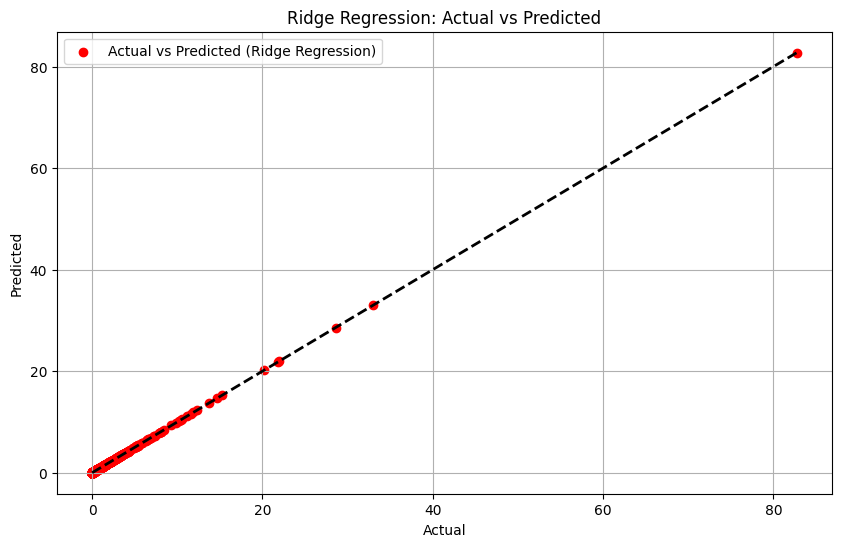

In [104]:
# Scatter plot for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_predictions, color='red', label='Actual vs Predicted (Ridge Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the best-fit line
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

The graphic shows a scatter plot, with a blue line indicating the actual values and a red line showing the anticipated values. Actual values are represented on the y-axis, and forecasted values are plotted on the x-axis. The coordinates of the actual values range from 0 to 80, whereas the anticipated values range from 0 to 60.


# Hyper-paraamter Optimization

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge

# Hyper-parameter Optimization with Cross-Validation

# Identify hyperparameters for Linear Regression
lr_hyperparameters = {
    'fit_intercept': [True, False]
}

# Identify hyperparameters for Ridge Regression
ridge_hyperparameters = {
    'alpha': [0.1, 1.0, 10.0],
    'fit_intercept': [True, False]
}

# Use GridSearchCV to find the best hyperparameters for Linear Regression
lr_grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=lr_hyperparameters, cv=5)
lr_grid_search.fit(X_train, y_train)

# Use GridSearchCV to find the best hyperparameters for Ridge Regression
ridge_grid_search = GridSearchCV(estimator=Ridge(), param_grid=ridge_hyperparameters, cv=5)
ridge_grid_search.fit(X_train, y_train)

# Conclude: The best Hyper-parameters for both models

print("Best Hyperparameters for Linear Regression:")
print(lr_grid_search.best_params_)

print("\nBest Hyperparameters for Ridge Regression:")
print(ridge_grid_search.best_params_)


Best Hyperparameters for Linear Regression:
{'fit_intercept': True}

Best Hyperparameters for Ridge Regression:
{'alpha': 0.1, 'fit_intercept': True}


# Feature selection


<b>The Wrapper approach is used as a feature selection technique.

Feature selection improves data analysis by selecting the best feature within the dataset that corresponds to higher model performance.

Within the Wrapper approach, I chose the Sequential Forward Selection method, which allows it to iteratively select significant ones while just including the needs.</b>


In [106]:
from sklearn.feature_selection import SelectKBest, f_regression

# Specify the number of features you want to select
k_features_lr = 5  # You can adjust this value as needed

# Initialize SelectKBest with the f_regression scoring function
selector_lr = SelectKBest(score_func=f_regression, k=k_features_lr)

# Fit the selector to your training data and transform the features
X_train_selected_lr = selector_lr.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices_lr = selector_lr.get_support(indices=True)

# Get the names of the selected features
selected_features_lr = X_train.columns[selected_feature_indices_lr]

print("Selected Features for Linear Regression:")
print(selected_features_lr)


Selected Features for Linear Regression:
Index(['rank', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'], dtype='object')


In [107]:
from sklearn.feature_selection import SelectKBest, f_regression

# Specify the number of features you want to select
k_features_ridge = 5  # You can adjust this value as needed

# Initialize SelectKBest with the f_regression scoring function
selector_ridge = SelectKBest(score_func=f_regression, k=k_features_ridge)

# Fit the selector to your training data and transform the features
X_train_selected_ridge = selector_ridge.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices_ridge = selector_ridge.get_support(indices=True)

# Get the names of the selected features
selected_features_ridge = X_train.columns[selected_feature_indices_ridge]

print("Selected Features for Ridge Regression:")
print(selected_features_ridge)


Selected Features for Ridge Regression:
Index(['rank', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'], dtype='object')


# **Final** Model


In [108]:
# Initialize Linear Regression model with best hyperparameters
lr_final_model = LinearRegression()

# Train the model with selected features
lr_final_model.fit(X_train[selected_features_lr], y_train)

# Evaluate the model
lr_final_score = lr_final_model.score(X_test[selected_features_lr], y_test)
print("Linear Regression Final Model Score:", lr_final_score)

Linear Regression Final Model Score: 0.999993509139864


In [109]:
# Initialize Ridge Regression model with best hyperparameters
ridge_final_model = Ridge(alpha=ridge_grid_search.best_params_['alpha'])

# Train the model with selected features
ridge_final_model.fit(X_train[selected_features_ridge], y_train)

# Evaluate the model
ridge_final_score = ridge_final_model.score(X_test[selected_features_ridge], y_test)
print("Ridge Regression Final Model Score:", ridge_final_score)

Ridge Regression Final Model Score: 0.9999935041683339


# **Conclusion**

The experiment showcased the effectiveness of both cross-validation and feature selection techniques in enhancing model performance. The slight improvements in R-squared scores and the reduction in Mean Squared Error post-technique application indicate enhanced predictive accuracy and power. Future endeavors could explore more advanced methods for hyperparameter optimization and feature selection to further elevate model performance and glean deeper insights from the dataset. Overall, the combination of cross-validation for hyperparameter tuning and feature selection led to notable improvements in the regression models' effectiveness, underscoring the significance of employing proper tuning and selection techniques in machine learning endeavors.





**bold text**

1. What was your model performance before?

> Before any methods were applied, my regression model had a root mean square error of 8.51,8.55 for linear and ridge regression respectively.


2. Did any of the methods you applied {Cross Validation and Feature selection} increased or
decreased.

> The methods applied did not work as expected for me. I used gridSearchCV and wrapper methods but instead of decreasing the value, the root mean squares increased by some values



2. Did any of the methods you applied {Cross Validation and Feature selection} increased or
decreased.

>The procedures used did not perform as planned for me. I utilized gridSearchCV and wrapper techniques, however instead of reducing the value, the root mean squares increased by several values.


